In [1]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 1.7 MB/s 
     |████████████████████████████████| 9.8 MB 28.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from scipy import stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [4]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf

In [5]:
import scipy.stats as stats
from scipy.stats import norm, pearsonr, skew, kurtosis
import statistics

In [6]:
import statistics
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.stattools import adfuller
plt.style.use('ggplot')

In [7]:
import math
import keras

In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [116]:
from statsmodels.tsa.holtwinters import  SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

#A10.csv

In [117]:
df = pd.read_csv("https://raw.githubusercontent.com/ammaarahmad1999/Time_Series_Dataset/main/a10.csv")

#**Q1**

#Simple Exponential Smoothing

In [128]:
df['SES'] = SimpleExpSmoothing(df['x']).fit(smoothing_level=0.5,optimized=True).fittedvalues

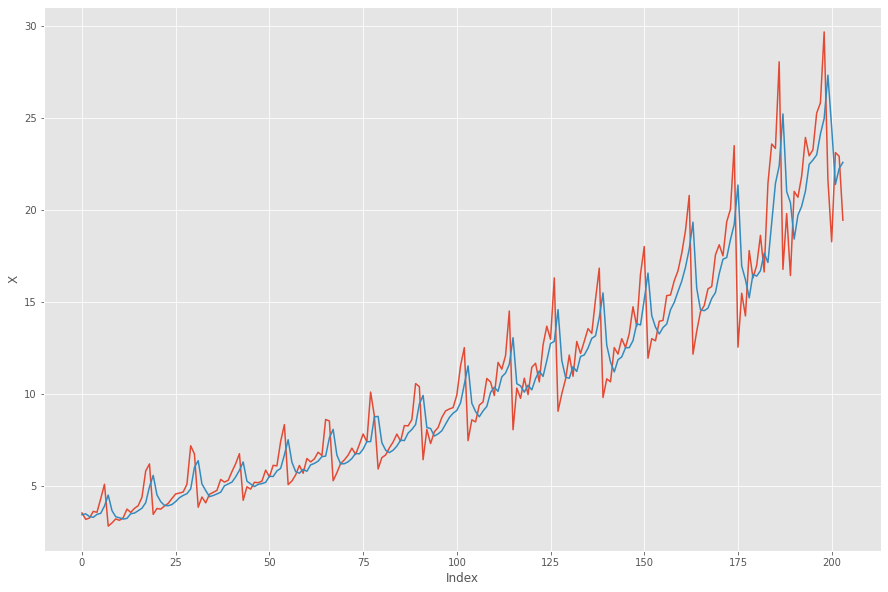

In [129]:
plt.figure(figsize=(15, 10))
plt.plot(df['x'], label = 'X')
plt.plot(df['SES'], label = 'SES')
plt.xlabel('Index')
plt.ylabel('X')
plt.show()

In [130]:
## MSE
print("MSE: ", mean_squared_error(df['x'], df['SES']))

MSE:  4.059952551446532


#Holt 

In [131]:
df['Holt']=Holt(df['x'].values).fit(smoothing_level = 0.5, smoothing_slope = 0.5, optimized = True).fittedvalues

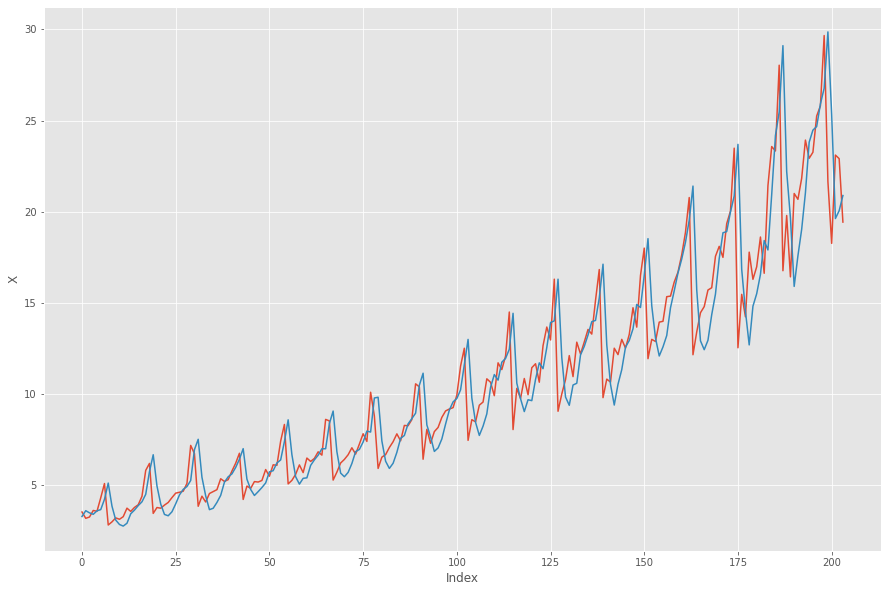

In [132]:
plt.figure(figsize=(15, 10))
plt.plot(df['x'], label = 'X')
plt.plot(df['Holt'], label = 'Holt')
plt.xlabel('Index')
plt.ylabel('X')
plt.show()

In [133]:
## MSE
print("MSE: ", mean_squared_error(df['x'], df['Holt']))

MSE:  5.679114202335799


In [136]:
df['Holt_L']=pd.Series(Holt(df['x'].values).fit(smoothing_level = 0.5, smoothing_slope = 0.5, optimized = True).level).shift(1)

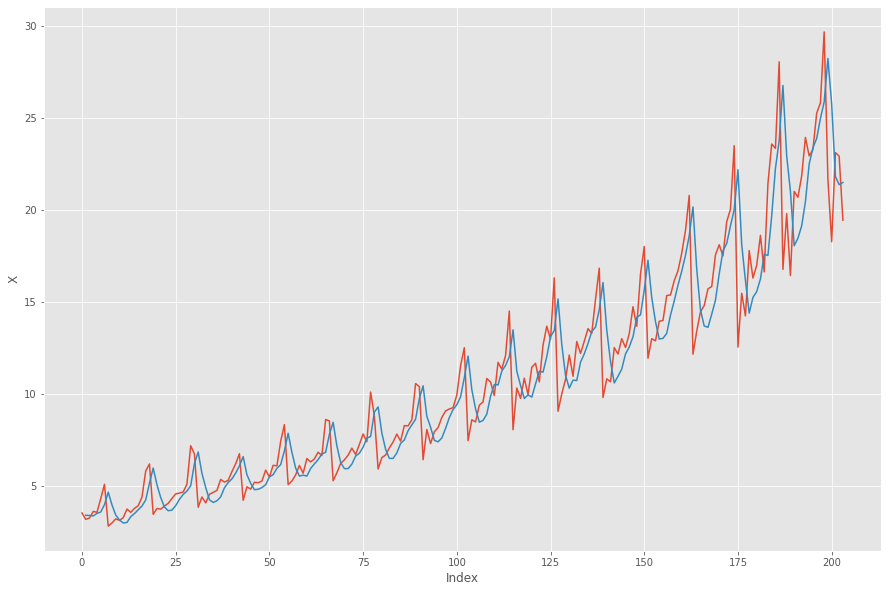

In [137]:
plt.figure(figsize=(15, 10))
plt.plot(df['x'], label = 'X')
plt.plot(df['Holt_L'], label = 'Holt_L')
plt.xlabel('Index')
plt.ylabel('X')
plt.show()

In [139]:
## MSE
print("MSE: ", mean_squared_error(df['x'][1:], df['Holt_L'][1:]))

MSE:  4.790828621249443


#Holt WInters

In [141]:
df['Holt-Winters']=ExponentialSmoothing(np.asarray(df['x']), trend='additive', seasonal='additive', seasonal_periods = 12).fit().fittedvalues

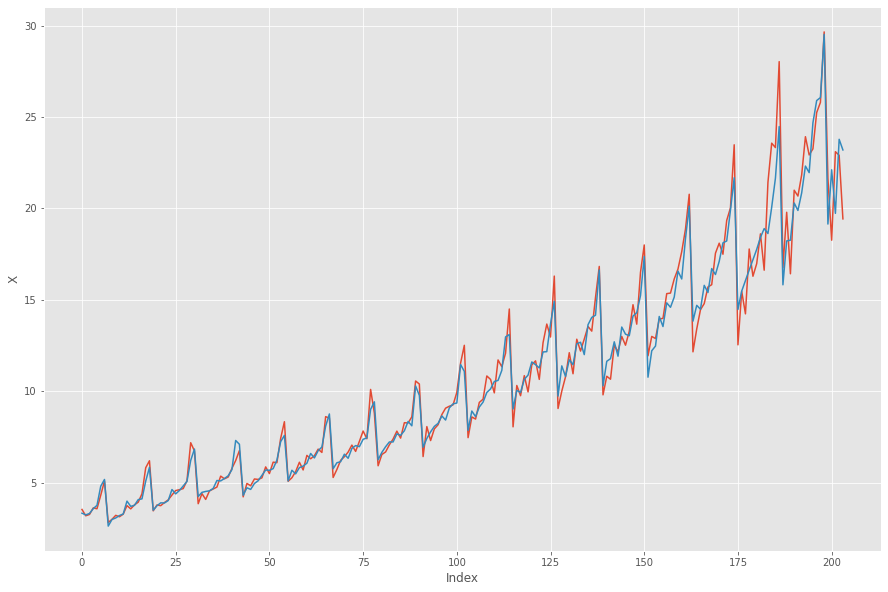

In [142]:
plt.figure(figsize=(15, 10))
plt.plot(df['x'], label = 'X')
plt.plot(df['Holt-Winters'], label = 'Holt_L')
plt.xlabel('Index')
plt.ylabel('X')
plt.show()

In [143]:
## MSE
print("MSE: ", mean_squared_error(df['x'][1:], df['Holt-Winters'][1:]))

MSE:  0.846422130310118


In [144]:
df['Holt-Winters-2']=ExponentialSmoothing(np.asarray(df['x']), trend='multiplicative', seasonal='additive', seasonal_periods = 12).fit().fittedvalues

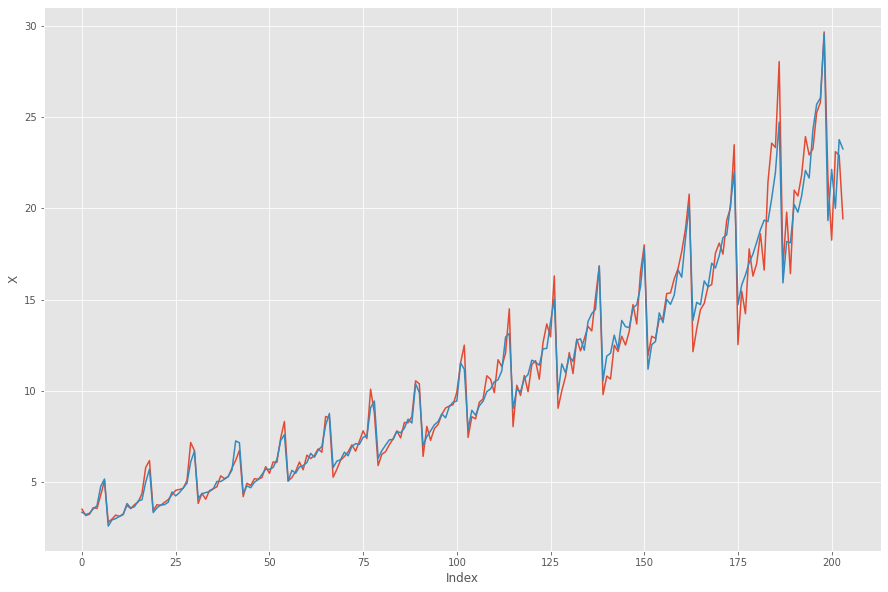

In [145]:
plt.figure(figsize=(15, 10))
plt.plot(df['x'], label = 'X')
plt.plot(df['Holt-Winters-2'], label = 'Holt_Winters_2')
plt.xlabel('Index')
plt.ylabel('X')
plt.show()

In [146]:
## MSE
print("MSE: ", mean_squared_error(df['x'][1:], df['Holt-Winters-2'][1:]))

MSE:  0.8077354699214612


In [147]:
df['Holt-Winters-3']=ExponentialSmoothing(np.asarray(df['x']), trend='additive', seasonal='multiplicative', seasonal_periods = 12).fit().fittedvalues

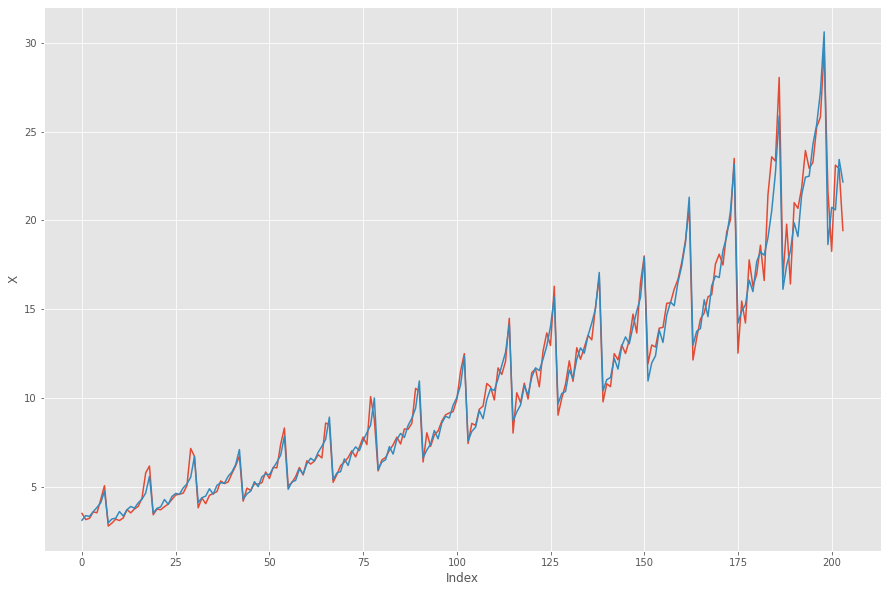

In [148]:
plt.figure(figsize=(15, 10))
plt.plot(df['x'], label = 'X')
plt.plot(df['Holt-Winters-3'], label = 'Holt_Winters_3')
plt.xlabel('Index')
plt.ylabel('X')
plt.show()

In [150]:
## MSE
print("MSE: ", mean_squared_error(df['x'][1:], df['Holt-Winters-3'][1:]))

MSE:  0.6027930277138566


In [151]:
df['Holt-Winters-4']=ExponentialSmoothing(np.asarray(df['x']), trend='multiplicative', seasonal='multiplicative', seasonal_periods = 12).fit().fittedvalues

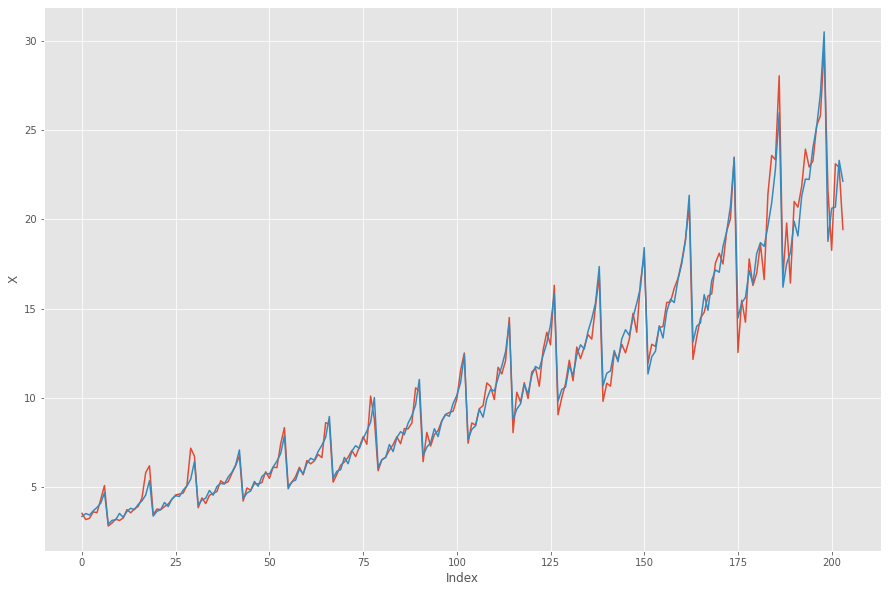

In [152]:
plt.figure(figsize=(15, 10))
plt.plot(df['x'], label = 'X')
plt.plot(df['Holt-Winters-4'], label = 'Holt_Winters_4')
plt.xlabel('Index')
plt.ylabel('X')
plt.show()

In [153]:
## MSE
print("MSE: ", mean_squared_error(df['x'][1:], df['Holt-Winters-4'][1:]))

MSE:  0.5716754565829936


In [155]:
train = df.iloc[:-24]
test = df.iloc[-24:]

In [156]:
fitted_model = ExponentialSmoothing(train['x'], trend='multiplicative', seasonal='multiplicative', seasonal_periods=12).fit()

In [157]:
test_predictions = fitted_model.forecast(24).rename('HW Test Forecast')

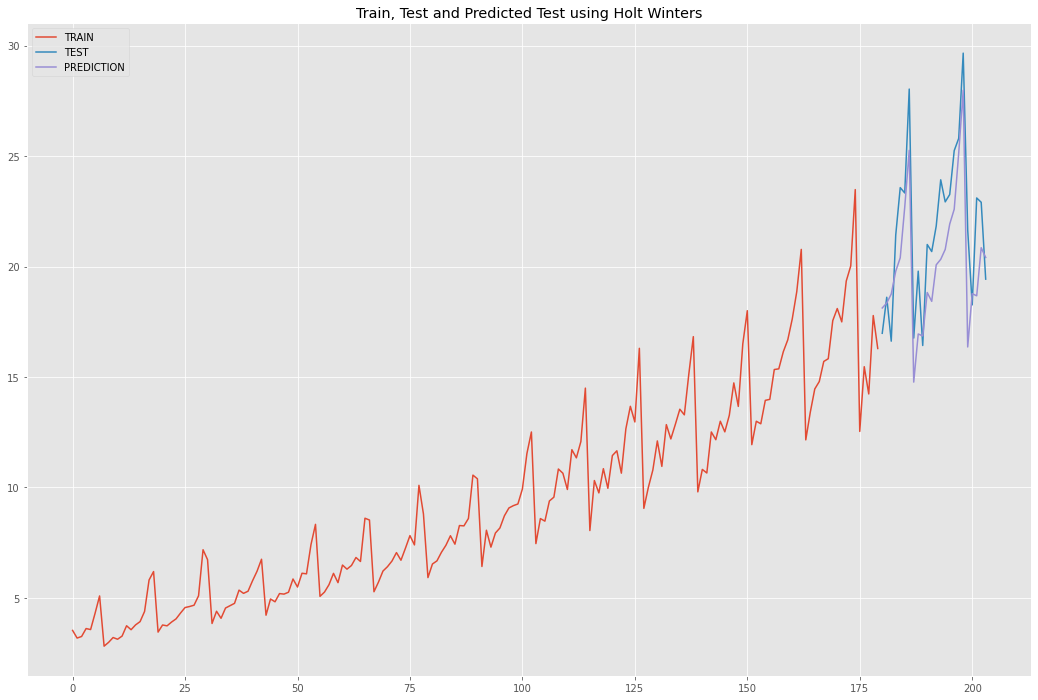

In [160]:
train['x'].plot(legend=True,label='TRAIN')
test['x'].plot(legend=True,label='TEST',figsize=(18,12))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters');

In [159]:
test['Holt-Winters-5'] = test_predictions

In [162]:
## MSE
print("MSE: ", mean_squared_error(test['x'][1:], test['Holt-Winters-5'][1:]))

MSE:  5.8018433522163475


#**Holt-Winter Multiplicative Seasonal and Trend model gives MSE = 5.80**

#**Q2**

In [10]:
df['y'] = df['x'].diff()
df['z'] = df['y'].diff()

In [11]:
df

,Unnamed: 0,x,y,z
0,1,3.526591,NaN,NaN
1,2,3.180891,-0.345700,NaN
2,3,3.252221,0.071330,0.417030
3,4,3.611003,0.358782,0.287452
4,5,3.565869,-0.045134,-0.403916
...,...,...,...,...
199,200,21.654285,-8.011071,-11.870337
200,201,18.264945,-3.389340,4.621731
201,202,23.107677,4.842732,8.232072
202,203,22.912510,-0.195167,-5.037899


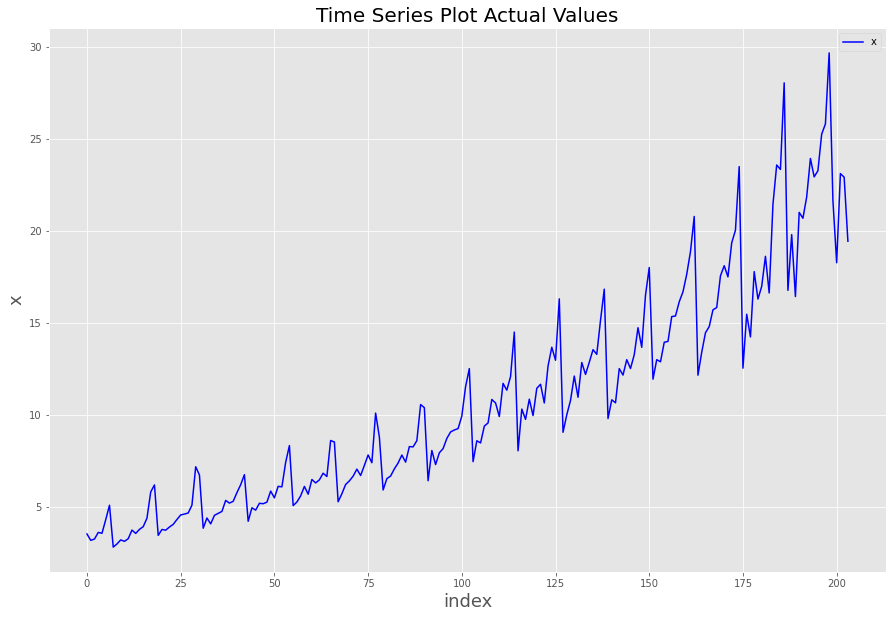

In [12]:
axl = df.plot(kind='line', y='x', color='blue', figsize=(15, 10))
plt.title('Time Series Plot Actual Values', size=20)
plt.xlabel('index', size=18)
plt.ylabel('x', size=18)
plt.show()

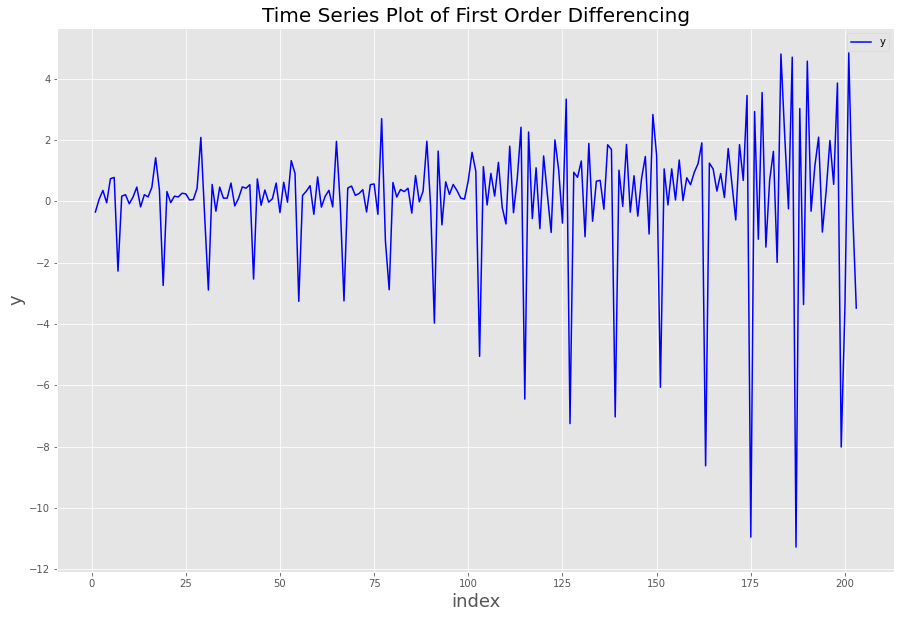

In [13]:
axl = df.plot(kind='line', y='y', color='blue', figsize=(15, 10))
plt.title('Time Series Plot of First Order Differencing', size=20)
plt.xlabel('index', size=18)
plt.ylabel('y', size=18)
plt.show()

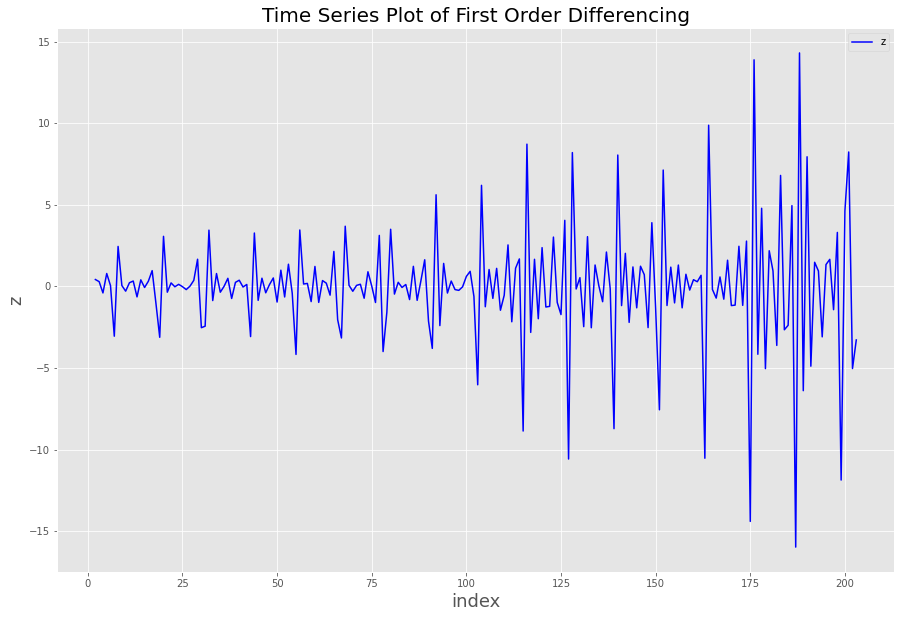

In [14]:
axl = df.plot(kind='line', y='z', color='blue', figsize=(15, 10))
plt.title('Time Series Plot of First Order Differencing', size=20)
plt.xlabel('index', size=18)
plt.ylabel('z', size=18)
plt.show()

**Dickey Fuller Test**

In [15]:
test = adfuller(df['x'], autolag = 'AIC')
print(f'P value of original dataset = {test[1]}')
test = adfuller(df['y'].dropna(), autolag = 'AIC')
print(f'P value of first lag = {test[1]}')
test = adfuller(df['z'].dropna(), autolag = 'AIC')
print(f'P value of second lag = {test[1]}')

P value of original dataset = 1.0
P value of first lag = 0.1166534168647036
P value of second lag = 3.543916358530541e-18


**P value of second lag difference shows it is stationary**

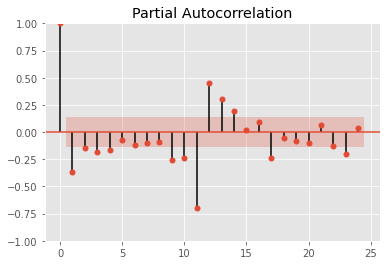

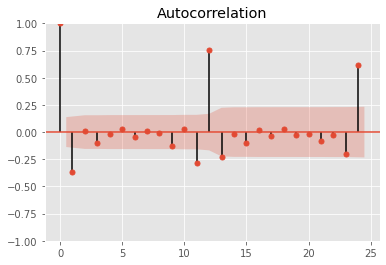

In [16]:
plot_pacf(df['y'].dropna());
plot_acf(df['y'].dropna());

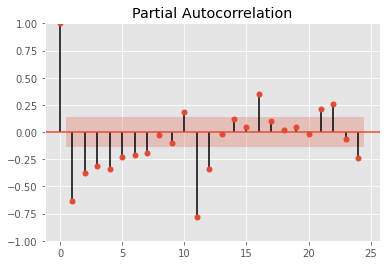

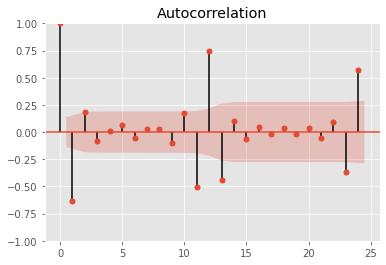

In [17]:
plot_pacf(df['z'].dropna());
plot_acf(df['z'].dropna());

**PACF plot indicates seasonal MA(1) and regular MA(1) \
ACF plot indicates seasonal AR(1) and regular AR(p) with p <= 7 have signficance \
Seasonal Period = 11 or 12 are the best fit according to plots**

#We already got d = 2 for regular ARIMA and Sesonality lag of 11 or 12 seems best

In [18]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['x'].dropna(), d = 2, m=11, trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[11]             : AIC=inf, Time=1.29 sec
 ARIMA(0,2,0)(0,0,0)[11]             : AIC=1103.392, Time=0.02 sec
 ARIMA(1,2,0)(1,0,0)[11]             : AIC=992.008, Time=0.08 sec
 ARIMA(0,2,1)(0,0,1)[11]             : AIC=inf, Time=0.34 sec
 ARIMA(1,2,0)(0,0,0)[11]             : AIC=1001.270, Time=0.02 sec
 ARIMA(1,2,0)(2,0,0)[11]             : AIC=971.340, Time=0.25 sec
 ARIMA(1,2,0)(2,0,1)[11]             : AIC=948.979, Time=0.81 sec
 ARIMA(1,2,0)(1,0,1)[11]             : AIC=inf, Time=0.32 sec
 ARIMA(1,2,0)(2,0,2)[11]             : AIC=950.688, Time=1.30 sec
 ARIMA(1,2,0)(1,0,2)[11]             : AIC=inf, Time=0.61 sec
 ARIMA(0,2,0)(2,0,1)[11]             : AIC=1004.360, Time=0.40 sec
 ARIMA(2,2,0)(2,0,1)[11]             : AIC=inf, Time=0.93 sec
 ARIMA(1,2,1)(2,0,1)[11]             : AIC=inf, Time=1.86 sec
 ARIMA(0,2,1)(2,0,1)[11]             : AIC=inf, Time=1.52 sec
 ARIMA(2,2,1)(2,0,1)[11]             : AIC=inf, Time=2.39 

In [19]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['x'].dropna(), start_q = 1, max_q = 1, d = 2, trace=True, suppress_warnings=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,2,1)(1,1,1)[12]             : AIC=inf, Time=2.71 sec
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=873.003, Time=0.03 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=706.734, Time=0.13 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=inf, Time=0.83 sec
 ARIMA(1,2,0)(0,1,0)[12]             : AIC=721.377, Time=0.05 sec
 ARIMA(1,2,0)(2,1,0)[12]             : AIC=701.327, Time=0.45 sec
 ARIMA(1,2,0)(2,1,1)[12]             : AIC=700.922, Time=1.59 sec
 ARIMA(1,2,0)(1,1,1)[12]             : AIC=699.814, Time=0.42 sec
 ARIMA(1,2,0)(0,1,1)[12]             : AIC=698.224, Time=0.29 sec
 ARIMA(1,2,0)(0,1,2)[12]             : AIC=699.671, Time=1.70 sec
 ARIMA(1,2,0)(1,1,2)[12]             : AIC=701.043, Time=1.08 sec
 ARIMA(0,2,0)(0,1,1)[12]             : AIC=849.898, Time=0.16 sec
 ARIMA(2,2,0)(0,1,1)[12]             : AIC=614.188, Time=0.34 sec
 ARIMA(2,2,0)(0,1,0)[12]             : AIC=646.234, Time=0.07 sec
 ARIMA(2,2,0)(1,1,1)[12]             : AI

In [20]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['x'].dropna(), d = 2, m=12, max_p = 7, trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,1,1)[12]             : AIC=inf, Time=2.62 sec
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=873.003, Time=0.03 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=706.734, Time=0.13 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=inf, Time=0.84 sec
 ARIMA(1,2,0)(0,1,0)[12]             : AIC=721.377, Time=0.05 sec
 ARIMA(1,2,0)(2,1,0)[12]             : AIC=701.327, Time=0.44 sec
 ARIMA(1,2,0)(2,1,1)[12]             : AIC=700.922, Time=1.58 sec
 ARIMA(1,2,0)(1,1,1)[12]             : AIC=699.814, Time=0.43 sec
 ARIMA(1,2,0)(0,1,1)[12]             : AIC=698.224, Time=0.26 sec
 ARIMA(1,2,0)(0,1,2)[12]             : AIC=699.671, Time=1.66 sec
 ARIMA(1,2,0)(1,1,2)[12]             : AIC=701.043, Time=1.06 sec
 ARIMA(0,2,0)(0,1,1)[12]             : AIC=849.898, Time=0.15 sec
 ARIMA(2,2,0)(0,1,1)[12]             : AIC=614.188, Time=0.32 sec
 ARIMA(2,2,0)(0,1,0)[12]             : AIC=646.234, Time=0.06 sec
 ARIMA(2,2,0)(1,1,1)[12]             : AI

**Finding best fit model with seasonal period = 12 AIC was lower with respect to seasonal period = 11. Hence Seasonal Period = 12 is set \
ARIMA(7,2,0)(0,1,1)(12) has lowest AIC score. This is same order we got using PACF/ACF plots. We will now fit this model**

In [21]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['z'].dropna(), m=12, stationary = True, trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=596.679, Time=1.95 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1105.388, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=776.435, Time=0.22 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.69 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1103.392, Time=0.01 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=inf, Time=1.45 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=inf, Time=1.28 sec
 ARIMA(2,0,2)(2,0,1)[12] intercept   : AIC=inf, Time=3.40 sec
 ARIMA(2,0,2)(1,0,2)[12] intercept   : AIC=600.158, Time=3.67 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(2,0,2)(0,0,2)[12] intercept   : AIC=693.053, Time=2.99 sec
 ARIMA(2,0,2)(2,0,0)[12] intercept   : AIC=602.302, Time=3.41 sec
 ARIMA(2,0,2)(2,0,2)[12] intercept   : AIC=600.711, Time=4.09 sec
 ARIMA(1,0,2)(1,0,1)[12] intercept   : AIC=592.367, Time=1.50 sec
 ARIMA(1,0,2)(0,0,1)[12] intercept   : AIC=inf, Tim

**On fitting the dataset with second lag difference Model with lowest AIC score ARIMA(1,0,2)(1,0,1)(12). \
This has least number of parameters hence using this model to fit the dataset**

#Fit the Model

In [22]:
train=df.iloc[:-24]
test=df.iloc[-24:]
print(train.shape,test.shape)

(180, 4) (24, 4)


In [23]:
# Fit the model
model1 = sm.tsa.statespace.SARIMAX(train['x'], trend='c', order=(1,2,2), seasonal_order=(1,0,1,12))
model1_fit = model1.fit(disp=False)
print(model1_fit.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    x   No. Observations:                  180
Model:             SARIMAX(1, 2, 2)x(1, 0, [1], 12)   Log Likelihood                -190.693
Date:                              Sat, 27 Nov 2021   AIC                            395.387
Time:                                      02:39:23   BIC                            417.659
Sample:                                           0   HQIC                           404.419
                                              - 180                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.198e-05      0.000      0.038      0.970      -0.001       0.001
ar.L1         -0.27

In [24]:
start=len(train)
end=len(train)+len(test)-1
predictions = model1_fit.predict(start = start, end = end, dynamic = False)

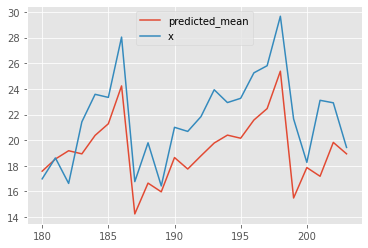

In [25]:
predictions.plot(legend=True)
test['x'].plot(legend=True)
plt.show()

In [26]:
mse = mean_squared_error(test['x'], predictions)
rmse = math.sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 3.173631


**We found that SARIMA(1,2,2)(1,0,1,12) have similar shape but residuals are always negative**

In [27]:
# Fit the model
model3 = sm.tsa.statespace.SARIMAX(train['x'], trend='c', order=(7,2,0), seasonal_order=(0,1,1,12))
model3_fit = model3.fit(disp=False)
print(model3_fit.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    x   No. Observations:                  180
Model:             SARIMAX(7, 2, 0)x(0, 1, [1], 12)   Log Likelihood                -179.266
Date:                              Sat, 27 Nov 2021   AIC                            378.532
Time:                                      02:39:24   BIC                            409.652
Sample:                                           0   HQIC                           391.164
                                              - 180                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0076      0.048     -0.161      0.872      -0.101       0.086
ar.L1         -1.65

In [28]:
start=len(train)
end=len(train)+len(test)-1
predictions = model3_fit.predict(start = start, end = end, dynamic = False)

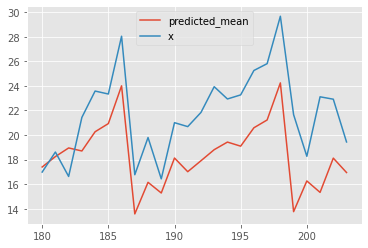

In [29]:
predictions.plot(legend=True)
test['x'].plot(legend=True)
plt.show()

In [30]:
mse = mean_squared_error(test['x'], predictions)
rmse = math.sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 4.044268


**Since P value for AR Lag6 and Lag7 is > 0.05 => they are insignificant**

In [31]:
# Fit the model
model2 = sm.tsa.statespace.SARIMAX(train['x'], trend='c', order=(5,2,0), seasonal_order=(0,1,1,12))
model2_fit = model2.fit(disp=False)
print(model2_fit.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    x   No. Observations:                  180
Model:             SARIMAX(5, 2, 0)x(0, 1, [1], 12)   Log Likelihood                -181.655
Date:                              Sat, 27 Nov 2021   AIC                            379.310
Time:                                      02:39:25   BIC                            404.206
Sample:                                           0   HQIC                           389.415
                                              - 180                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0064      0.048     -0.133      0.894      -0.100       0.088
ar.L1         -1.59

In [32]:
start=len(train)
end=len(train)+len(test)-1
predictions = model2_fit.predict(start = start, end = end, dynamic = False)

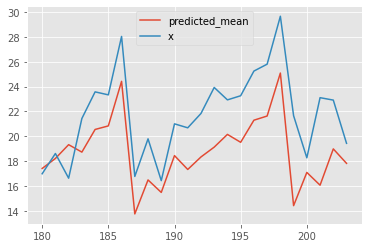

In [33]:
predictions.plot(legend=True)
test['x'].plot(legend=True)
plt.show()

In [34]:
mse = mean_squared_error(test['x'], predictions)
rmse = math.sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 3.622325


**We found that all 3 models have predictions and ground truth shape similar but residuals are always negative**

#Let Increase the Training Dataset to 95%

In [35]:
train=df.iloc[:-14]
test=df.iloc[-14:]
print(train.shape,test.shape)

(190, 4) (14, 4)


In [36]:
# Fit the model
model4 = sm.tsa.statespace.SARIMAX(train['x'], trend='c', order=(1,2,2), seasonal_order=(1,0,1,12))
model4_fit = model4.fit(disp=False)
print(model4_fit.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    x   No. Observations:                  190
Model:             SARIMAX(1, 2, 2)x(1, 0, [1], 12)   Log Likelihood                -237.072
Date:                              Sat, 27 Nov 2021   AIC                            488.144
Time:                                      02:39:27   BIC                            510.799
Sample:                                           0   HQIC                           497.323
                                              - 190                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   8.917e-06      0.000      0.071      0.943      -0.000       0.000
ar.L1         -0.29

In [37]:
start=len(train)
end=len(train)+len(test)-1
predictions = model4_fit.predict(start = start, end = end, dynamic = False)

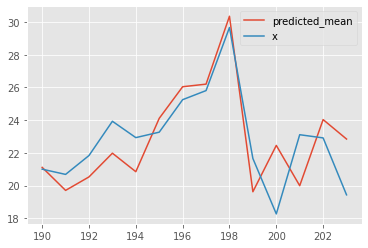

In [38]:
predictions.plot(legend=True)
test['x'].plot(legend=True)
plt.show()

#Now the residual seems around 0

In [39]:
test['predictions'] = predictions
test['residual'] = test['predictions'] - test['x']

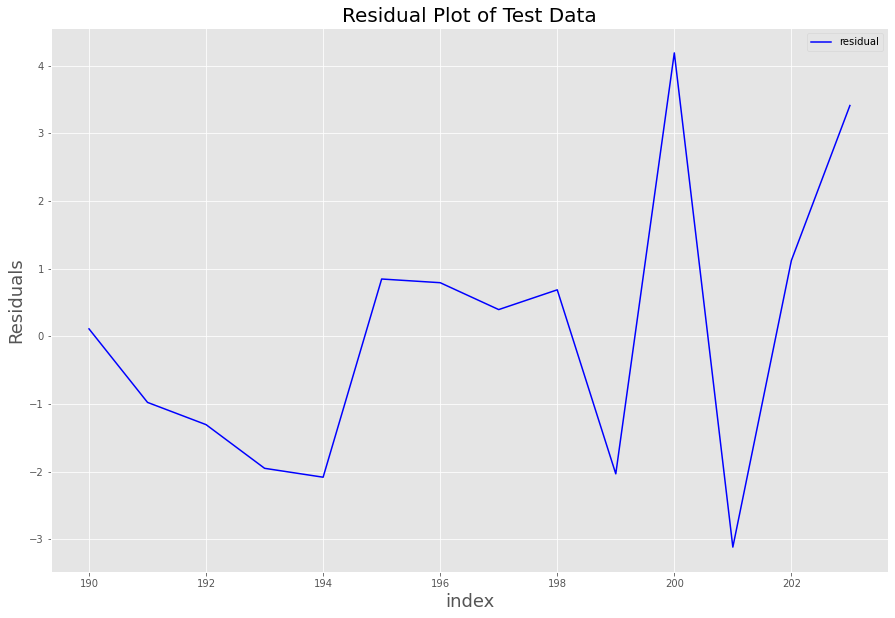

In [40]:
axl = test.plot(kind='line', y='residual', color='blue', figsize=(15, 10))
plt.title('Residual Plot of Test Data', size=20)
plt.xlabel('index', size=18)
plt.ylabel('Residuals', size=18)
plt.show()

In [41]:
adf = adfuller(test['residual'], autolag = 'AIC')
print(adf)
print(f'P value of Test residuals = {adf[1]}')

(-50.23419153183962, 0.0, 5, 8, {'1%': -4.6651863281249994, '5%': -3.3671868750000002, '10%': -2.802960625}, -20.141602480917335)
P value of Test residuals = 0.0


In [42]:
mse = mean_squared_error(test['x'], predictions)
rmse = math.sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 2.019533


In [43]:
mse = (test['residual']*test['residual']).mean()
rmse = math.sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 2.019533


#**Conclusion: Residual is stationary. SARIMA(1,2,2)(1,0,1,12)** 
#**fits this dataset with RMSE = 2.019533**

#**Q3**

#LSTM

In [44]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [45]:
train=df.iloc[:-34]
test=df.iloc[-34:]
print(train.shape,test.shape)

(170, 4) (34, 4)


In [46]:
train_size = len(train)
test_size = len(test)

In [47]:
train = np.expand_dims(train['x'],axis=1)
test = np.expand_dims(test['x'],axis=1)

In [48]:
def create_dataset(df, previous=1):
    dataX, dataY = [], []
    for i in range(len(df)-previous-1):
        a = df[i:(i+previous), 0]
        dataX.append(a)
        dataY.append(df[i + previous, 0])
    return np.array(dataX), np.array(dataY)

In [49]:
scaler = MinMaxScaler(feature_range=(0, 1))
train = scaler.fit_transform(train)

In [50]:
test = scaler.fit_transform(test)

In [51]:
lookback = 15
X_train, Y_train = create_dataset(train, lookback)
X_test, Y_test = create_dataset(test, lookback)

In [52]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(154, 15) (154,) (18, 15) (18,)


In [53]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(154, 15, 1) (154,) (18, 15, 1) (18,)


In [54]:
Y_test = scaler.inverse_transform([Y_test])

In [55]:
# Generate LSTM network
model = keras.models.Sequential()
model.add(keras.layers.LSTM(2, input_shape=(lookback, 1)))
model.add(keras.layers.Dense(1))
model.compile(loss='mse', optimizer='adam')
history=model.fit(X_train, Y_train, validation_split=0.1, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
138/138 - 3s - loss: 0.0209 - val_loss: 0.0410 - 3s/epoch - 20ms/step
Epoch 2/20
138/138 - 0s - loss: 0.0090 - val_loss: 0.0316 - 492ms/epoch - 4ms/step
Epoch 3/20
138/138 - 1s - loss: 0.0074 - val_loss: 0.0216 - 509ms/epoch - 4ms/step
Epoch 4/20
138/138 - 1s - loss: 0.0067 - val_loss: 0.0151 - 505ms/epoch - 4ms/step
Epoch 5/20
138/138 - 1s - loss: 0.0066 - val_loss: 0.0152 - 512ms/epoch - 4ms/step
Epoch 6/20
138/138 - 0s - loss: 0.0064 - val_loss: 0.0175 - 478ms/epoch - 3ms/step
Epoch 7/20
138/138 - 0s - loss: 0.0066 - val_loss: 0.0161 - 471ms/epoch - 3ms/step
Epoch 8/20
138/138 - 0s - loss: 0.0064 - val_loss: 0.0148 - 487ms/epoch - 4ms/step
Epoch 9/20
138/138 - 0s - loss: 0.0064 - val_loss: 0.0146 - 482ms/epoch - 3ms/step
Epoch 10/20
138/138 - 1s - loss: 0.0067 - val_loss: 0.0140 - 516ms/epoch - 4ms/step
Epoch 11/20
138/138 - 0s - loss: 0.0065 - val_loss: 0.0161 - 492ms/epoch - 4ms/step
Epoch 12/20
138/138 - 0s - loss: 0.0063 - val_loss: 0.0137 - 490ms/epoch - 4ms/step
Epo

dict_keys(['loss', 'val_loss'])


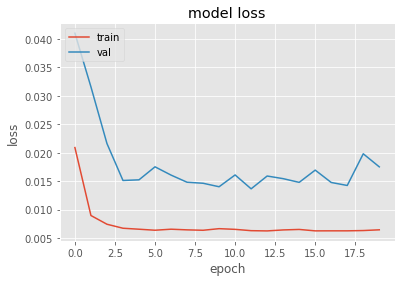

In [56]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [57]:
test_prediction = model.predict(X_test)
test_prediction = scaler.inverse_transform(test_prediction)

In [58]:
Y_test = Y_test.reshape(-1)
test_prediction = test_prediction.reshape(-1)

No handles with labels found to put in legend.


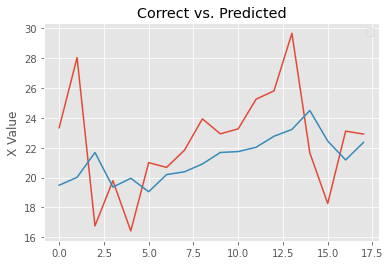

In [59]:
plt.plot(Y_test)
plt.plot(test_prediction)
plt.ylabel('X Value')
plt.title("Correct vs. Predicted")
plt.legend()
plt.show()

In [60]:
mse = mean_squared_error(Y_test, test_prediction)
rmse = math.sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 3.541196


#**Conclusion : SARIMA performs better that LSTM on this dataset** 
#**Explanation : Training Dataset is very little for LSTM to learn hence poor performance** 

#J

In [163]:
df = pd.read_csv("https://raw.githubusercontent.com/ammaarahmad1999/Time_Series_Dataset/main/dj.csv")

#**Q1**

#Simple Exponential Smoothing

In [173]:
df['SES'] = SimpleExpSmoothing(df['x']).fit(smoothing_level=0.5,optimized=True).fittedvalues

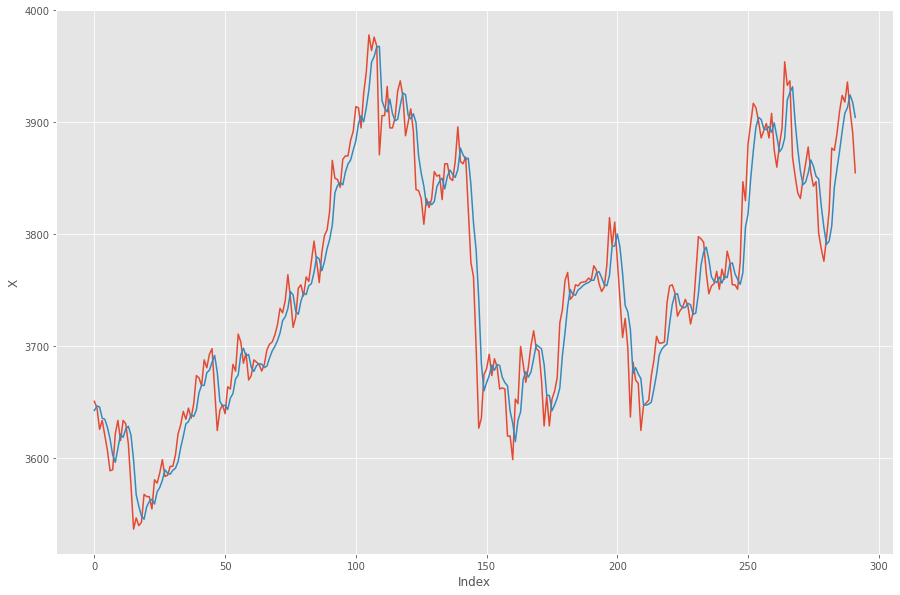

In [174]:
plt.figure(figsize=(15, 10))
plt.plot(df['x'], label = 'X')
plt.plot(df['SES'], label = 'SES')
plt.xlabel('Index')
plt.ylabel('X')
plt.show()

In [175]:
## MSE
print("MSE: ", mean_squared_error(df['x'], df['SES']))

MSE:  713.1978074212857


#Holt 

In [ ]:
df['Holt']=Holt(df['x'].values).fit(smoothing_level = 0.5, smoothing_slope = 0.5, optimized = True).fittedvalues

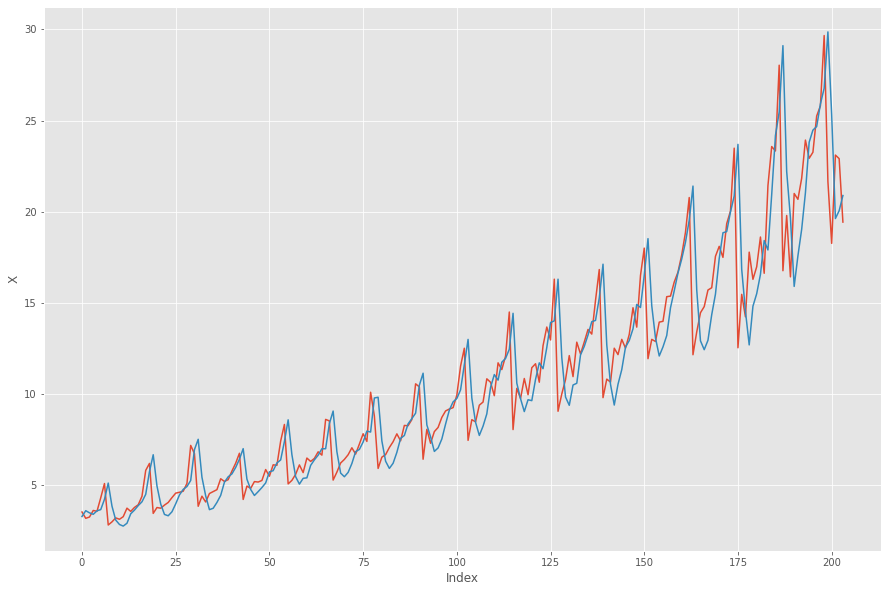

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(df['x'], label = 'X')
plt.plot(df['Holt'], label = 'Holt')
plt.xlabel('Index')
plt.ylabel('X')
plt.show()

In [ ]:
## MSE
print("MSE: ", mean_squared_error(df['x'], df['Holt']))

MSE:  5.679114202335799


In [ ]:
df['Holt_L']=pd.Series(Holt(df['x'].values).fit(smoothing_level = 0.5, smoothing_slope = 0.5, optimized = True).level).shift(1)

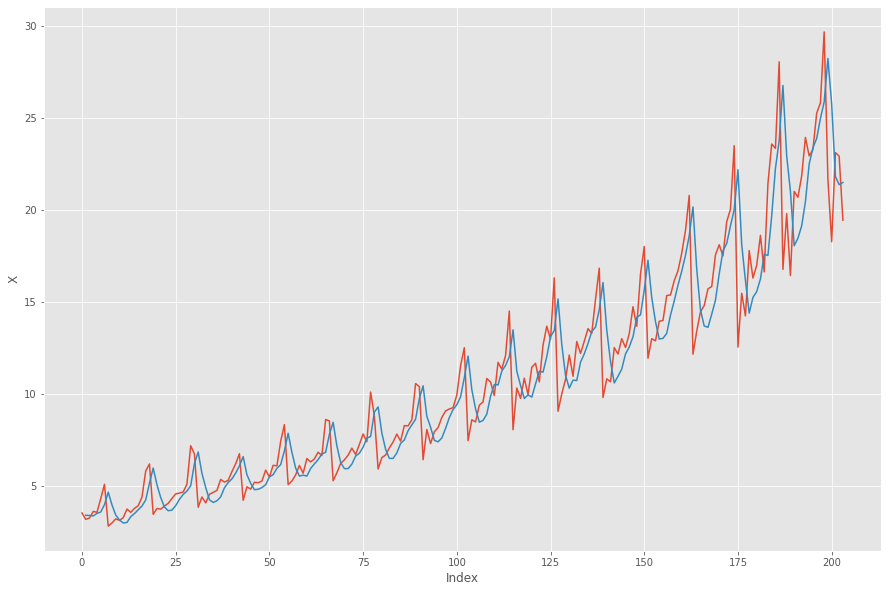

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(df['x'], label = 'X')
plt.plot(df['Holt_L'], label = 'Holt_L')
plt.xlabel('Index')
plt.ylabel('X')
plt.show()

In [ ]:
## MSE
print("MSE: ", mean_squared_error(df['x'][1:], df['Holt_L'][1:]))

MSE:  4.790828621249443


#Holt WInters

In [ ]:
df['Holt-Winters']=ExponentialSmoothing(np.asarray(df['x']), trend='additive', seasonal='additive', seasonal_periods = 12).fit().fittedvalues

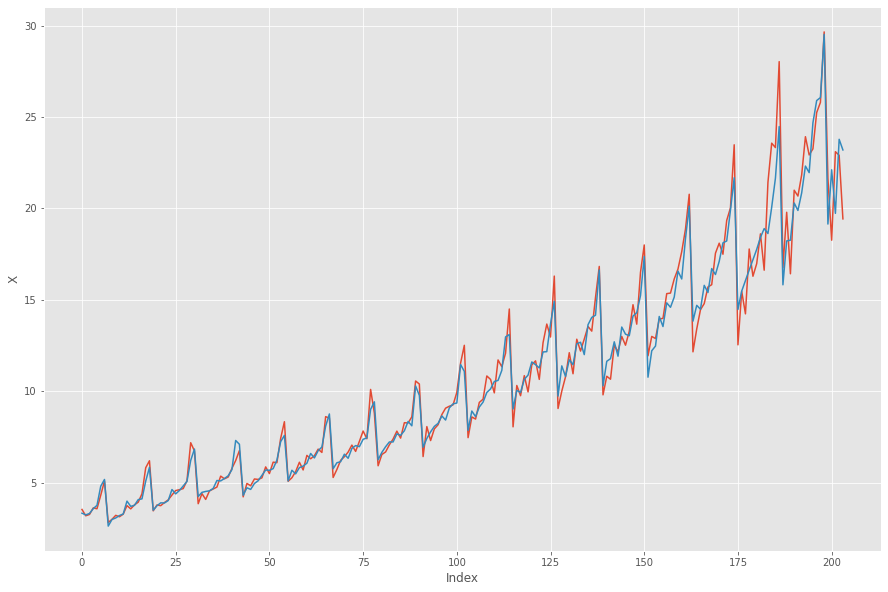

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(df['x'], label = 'X')
plt.plot(df['Holt-Winters'], label = 'Holt_L')
plt.xlabel('Index')
plt.ylabel('X')
plt.show()

In [ ]:
## MSE
print("MSE: ", mean_squared_error(df['x'][1:], df['Holt-Winters'][1:]))

MSE:  0.846422130310118


In [ ]:
df['Holt-Winters-2']=ExponentialSmoothing(np.asarray(df['x']), trend='multiplicative', seasonal='additive', seasonal_periods = 12).fit().fittedvalues

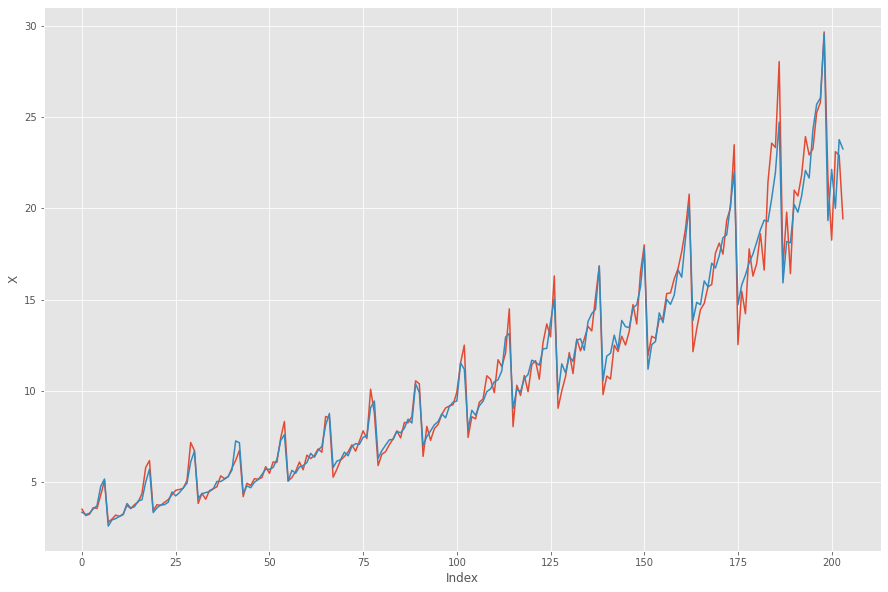

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(df['x'], label = 'X')
plt.plot(df['Holt-Winters-2'], label = 'Holt_Winters_2')
plt.xlabel('Index')
plt.ylabel('X')
plt.show()

In [ ]:
## MSE
print("MSE: ", mean_squared_error(df['x'][1:], df['Holt-Winters-2'][1:]))

MSE:  0.8077354699214612


In [ ]:
df['Holt-Winters-3']=ExponentialSmoothing(np.asarray(df['x']), trend='additive', seasonal='multiplicative', seasonal_periods = 12).fit().fittedvalues

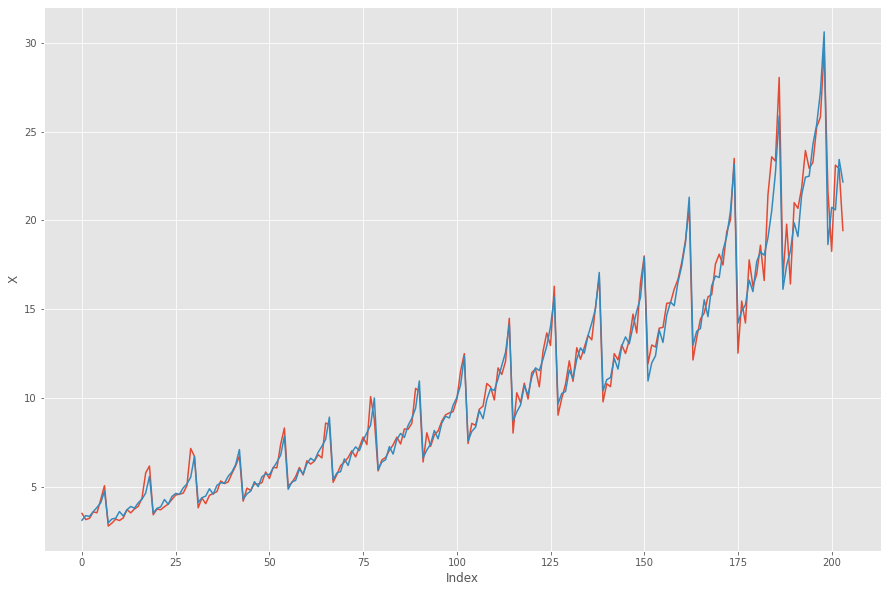

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(df['x'], label = 'X')
plt.plot(df['Holt-Winters-3'], label = 'Holt_Winters_3')
plt.xlabel('Index')
plt.ylabel('X')
plt.show()

In [ ]:
## MSE
print("MSE: ", mean_squared_error(df['x'][1:], df['Holt-Winters-3'][1:]))

MSE:  0.6027930277138566


In [ ]:
train = df.iloc[:-22]
test = df.iloc[-22:]

In [170]:
df['Holt-Winters-4']=ExponentialSmoothing(np.asarray(df['x']), trend='multiplicative', seasonal='multiplicative', seasonal_periods = 12).fit().fittedvalues

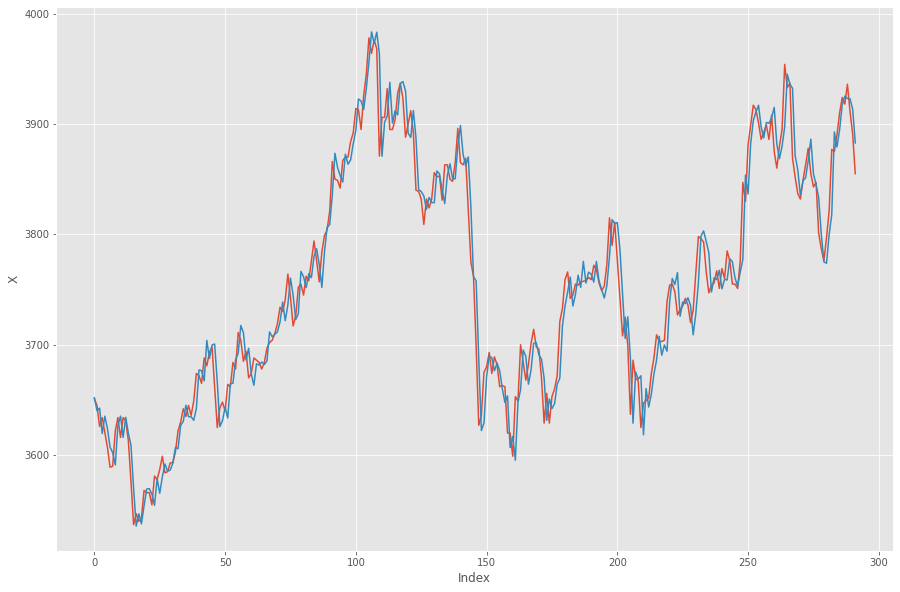

In [171]:
plt.figure(figsize=(15, 10))
plt.plot(df['x'], label = 'X')
plt.plot(df['Holt-Winters-4'], label = 'Holt_Winters_4')
plt.xlabel('Index')
plt.ylabel('X')
plt.show()

In [172]:
## MSE
print("MSE: ", mean_squared_error(df['x'][1:], df['Holt-Winters-4'][1:]))

MSE:  491.8238511842983


In [176]:
train = df.iloc[:-22]
test = df.iloc[-22:]

In [178]:
fitted_model = ExponentialSmoothing(train['x'], trend='additive', seasonal='multiplicative', seasonal_periods=12).fit()

In [179]:
test_predictions = fitted_model.forecast(24).rename('HW Test Forecast')

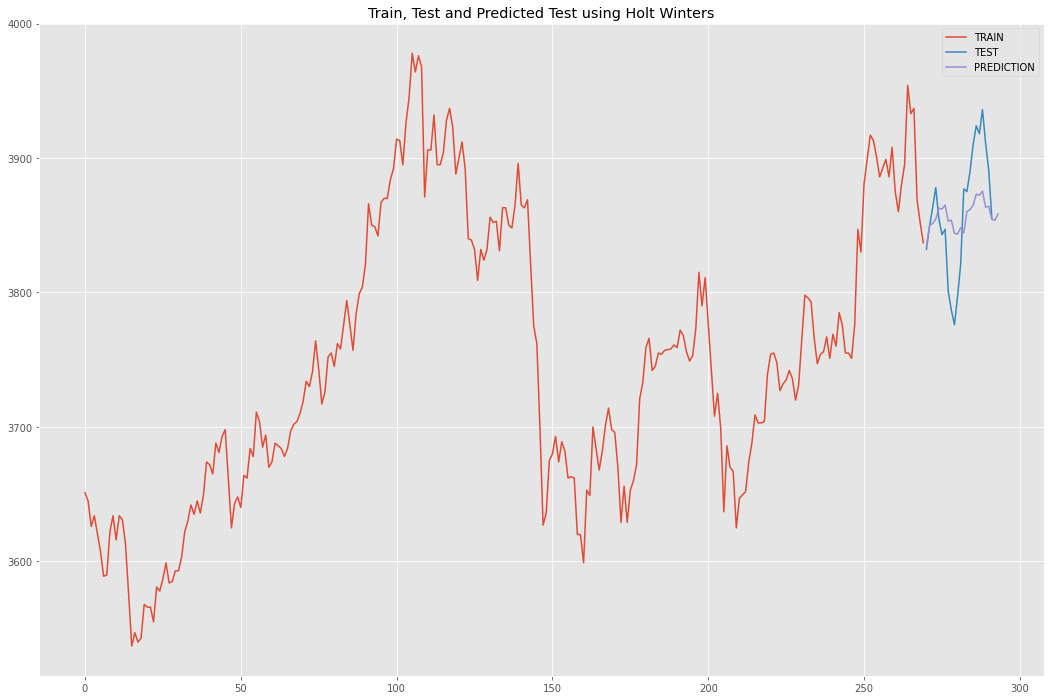

In [180]:
train['x'].plot(legend=True,label='TRAIN')
test['x'].plot(legend=True,label='TEST',figsize=(18,12))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters');

In [181]:
test['Holt-Winters-5'] = test_predictions

In [182]:
## MSE
print("MSE: ", mean_squared_error(test['x'][1:], test['Holt-Winters-5'][1:]))

MSE:  1504.220446683966


#**Holt Winter give poor results for this dataset**

#**Q2**

In [62]:
df['y'] = df['x'].diff()
df['z'] = df['y'].diff()

In [63]:
df

,Unnamed: 0,x,y,z
0,1,3651.0,NaN,NaN
1,2,3645.0,-6.0,NaN
2,3,3626.0,-19.0,-13.0
3,4,3634.0,8.0,27.0
4,5,3620.5,-13.5,-21.5
...,...,...,...,...
287,288,3918.0,-6.0,-20.0
288,289,3936.0,18.0,24.0
289,290,3911.0,-25.0,-43.0
290,291,3891.0,-20.0,5.0


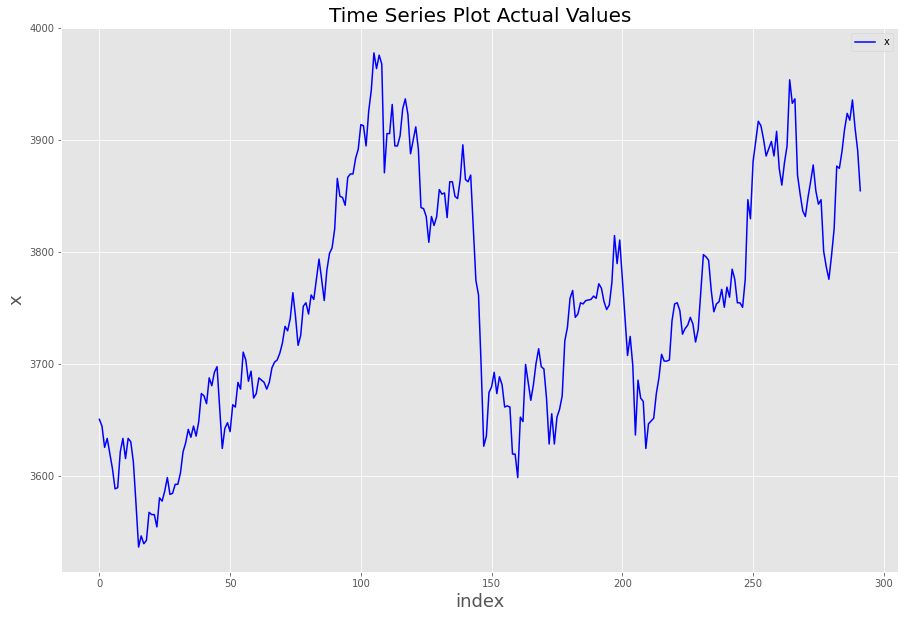

In [64]:
axl = df.plot(kind='line', y='x', color='blue', figsize=(15, 10))
plt.title('Time Series Plot Actual Values', size=20)
plt.xlabel('index', size=18)
plt.ylabel('x', size=18)
plt.show()

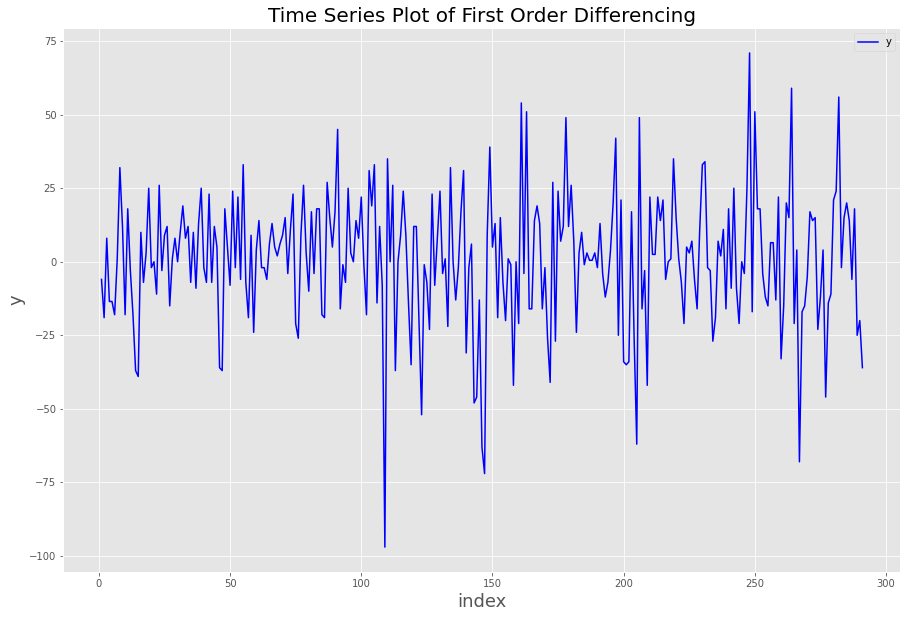

In [65]:
axl = df.plot(kind='line', y='y', color='blue', figsize=(15, 10))
plt.title('Time Series Plot of First Order Differencing', size=20)
plt.xlabel('index', size=18)
plt.ylabel('y', size=18)
plt.show()

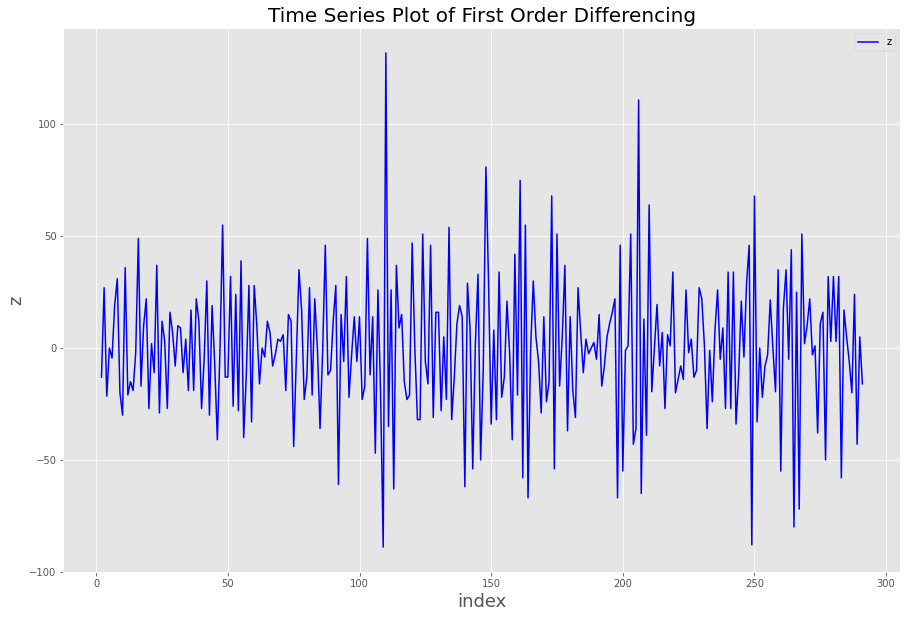

In [66]:
axl = df.plot(kind='line', y='z', color='blue', figsize=(15, 10))
plt.title('Time Series Plot of First Order Differencing', size=20)
plt.xlabel('index', size=18)
plt.ylabel('z', size=18)
plt.show()

**Dickey Fuller Test**

In [67]:
test = adfuller(df['x'], autolag = 'AIC')
print(f'P value of original dataset = {test[1]}')
test = adfuller(df['y'].dropna(), autolag = 'AIC')
print(f'P value of first lag = {test[1]}')
test = adfuller(df['z'].dropna(), autolag = 'AIC')
print(f'P value of second lag = {test[1]}')

P value of original dataset = 0.36359575951041095
P value of first lag = 5.187907879212891e-29
P value of second lag = 2.2929071898681716e-11


**P value of first lag difference shows it is stationary**

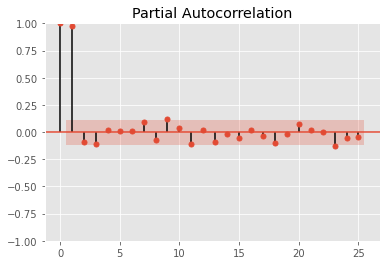

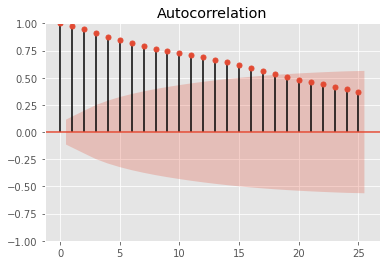

In [68]:
plot_pacf(df['x'].dropna());
plot_acf(df['x'].dropna());

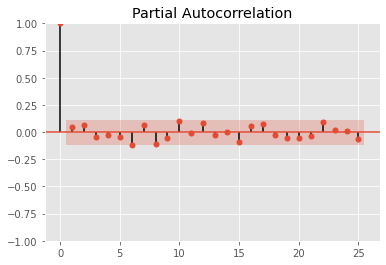

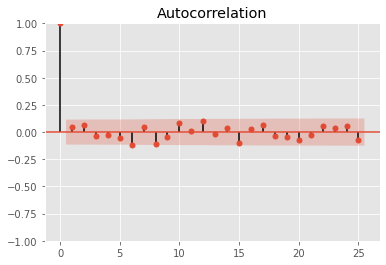

In [69]:
plot_pacf(df['y'].dropna());
plot_acf(df['y'].dropna());

**PACF and ACF Plot shows there is no dependency on previous lags and there is no seasonility in the dataset**

**We got differencing d = 1 and AR(0) and MA(0) most likely fits the model**

In [70]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['x'].dropna(), trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2644.618, Time=0.64 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2641.806, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2643.134, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2643.215, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2640.088, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2644.779, Time=0.15 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.013 seconds


#Fit the Model

In [71]:
df

,Unnamed: 0,x,y,z
0,1,3651.0,NaN,NaN
1,2,3645.0,-6.0,NaN
2,3,3626.0,-19.0,-13.0
3,4,3634.0,8.0,27.0
4,5,3620.5,-13.5,-21.5
...,...,...,...,...
287,288,3918.0,-6.0,-20.0
288,289,3936.0,18.0,24.0
289,290,3911.0,-25.0,-43.0
290,291,3891.0,-20.0,5.0


In [72]:
train=df.iloc[:-22]
test=df.iloc[-22:]
print(train.shape,test.shape)

(270, 4) (22, 4)


In [73]:
# Fit the model
model = sm.tsa.statespace.SARIMAX(train['x'], trend='c', order=(0,1,0))
model_fit = model.fit(disp=False)
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      x   No. Observations:                  270
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1218.829
Date:                Sat, 27 Nov 2021   AIC                           2441.657
Time:                        02:39:45   BIC                           2448.847
Sample:                             0   HQIC                          2444.545
                                - 270                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.6914      1.414      0.489      0.625      -2.080       3.463
sigma2       504.7412     32.784     15.396      0.000     440.485     568.997
Ljung-Box (L1) (Q):                   0.18   Jarque-

In [74]:
start=len(train)
end=len(train)+len(test)-1
predictions = model_fit.predict(start = start, end = end, dynamic = False)

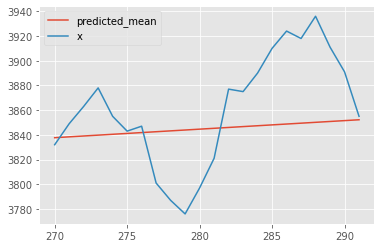

In [75]:
predictions.plot(legend=True)
test['x'].plot(legend=True)
plt.show()

In [76]:
mse = mean_squared_error(test['x'], predictions)
rmse = math.sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 45.283840


#Now the residual seems around 0

In [77]:
test['predictions'] = predictions
test['residual'] = test['predictions'] - test['x']

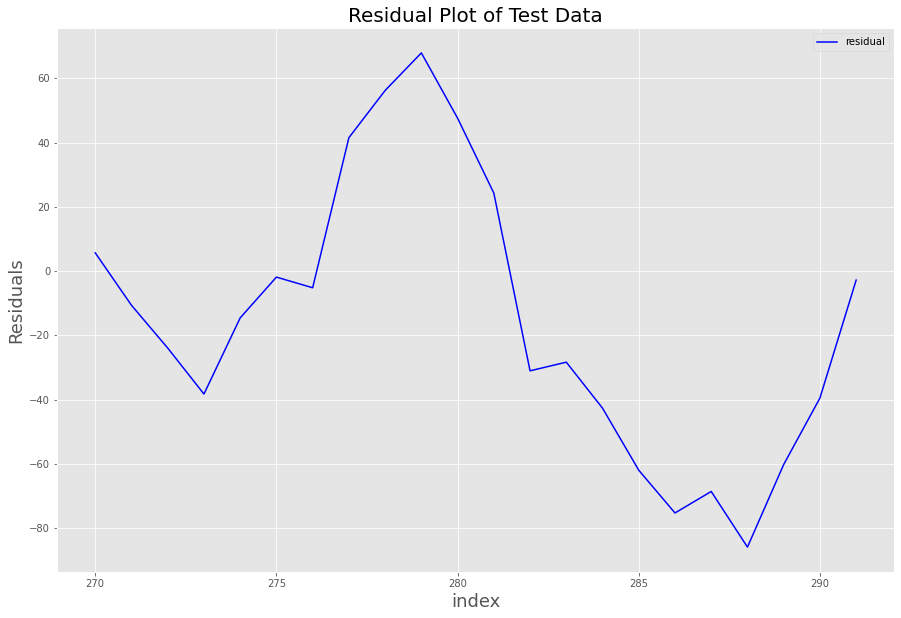

In [78]:
axl = test.plot(kind='line', y='residual', color='blue', figsize=(15, 10))
plt.title('Residual Plot of Test Data', size=20)
plt.xlabel('index', size=18)
plt.ylabel('Residuals', size=18)
plt.show()

In [79]:
adf = adfuller(test['residual'], autolag = 'AIC')
print(adf)
print(f'P value of Test residuals = {adf[1]}')

(-2.626524981956579, 0.08763806963458781, 9, 12, {'1%': -4.137829282407408, '5%': -3.1549724074074077, '10%': -2.7144769444444443}, 89.40904829062681)
P value of Test residuals = 0.08763806963458781


In [80]:
mse = mean_squared_error(test['x'], predictions)
rmse = math.sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 45.283840


In [81]:
mse = (test['residual']*test['residual']).mean()
rmse = math.sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 45.283840


#**Q3**

#LSTM

In [82]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [83]:
train=df.iloc[:-22]
test=df.iloc[-22:]
print(train.shape,test.shape)

(270, 4) (22, 4)


In [84]:
train_size = len(train)
test_size = len(test)

In [85]:
train = np.expand_dims(train['x'],axis=1)
test = np.expand_dims(test['x'],axis=1)

In [86]:
def create_dataset(df, previous=1):
    dataX, dataY = [], []
    for i in range(len(df)-previous-1):
        a = df[i:(i+previous), 0]
        dataX.append(a)
        dataY.append(df[i + previous, 0])
    return np.array(dataX), np.array(dataY)

In [87]:
scaler = MinMaxScaler(feature_range=(0, 1))
train = scaler.fit_transform(train)

In [88]:
test = scaler.fit_transform(test)

In [89]:
lookback = 5
X_train, Y_train = create_dataset(train, lookback)
X_test, Y_test = create_dataset(test, lookback)

In [90]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(264, 5) (264,) (16, 5) (16,)


In [91]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(264, 5, 1) (264,) (16, 5, 1) (16,)


In [92]:
Y_test = scaler.inverse_transform([Y_test])

In [93]:
# Generate LSTM network
model = keras.models.Sequential()
model.add(keras.layers.LSTM(2, input_shape=(lookback, 1)))
model.add(keras.layers.Dense(1))
model.compile(loss='mse', optimizer='adam')
history=model.fit(X_train, Y_train, validation_split=0.1, epochs=20, batch_size=1, verbose=2)

Epoch 1/20
237/237 - 3s - loss: 0.0465 - val_loss: 0.0431 - 3s/epoch - 11ms/step
Epoch 2/20
237/237 - 0s - loss: 0.0140 - val_loss: 0.0242 - 483ms/epoch - 2ms/step
Epoch 3/20
237/237 - 1s - loss: 0.0093 - val_loss: 0.0160 - 513ms/epoch - 2ms/step
Epoch 4/20
237/237 - 0s - loss: 0.0064 - val_loss: 0.0092 - 473ms/epoch - 2ms/step
Epoch 5/20
237/237 - 0s - loss: 0.0055 - val_loss: 0.0070 - 477ms/epoch - 2ms/step
Epoch 6/20
237/237 - 1s - loss: 0.0050 - val_loss: 0.0086 - 526ms/epoch - 2ms/step
Epoch 7/20
237/237 - 0s - loss: 0.0049 - val_loss: 0.0064 - 476ms/epoch - 2ms/step
Epoch 8/20
237/237 - 1s - loss: 0.0048 - val_loss: 0.0076 - 558ms/epoch - 2ms/step
Epoch 9/20
237/237 - 0s - loss: 0.0047 - val_loss: 0.0067 - 482ms/epoch - 2ms/step
Epoch 10/20
237/237 - 1s - loss: 0.0046 - val_loss: 0.0062 - 503ms/epoch - 2ms/step
Epoch 11/20
237/237 - 1s - loss: 0.0046 - val_loss: 0.0068 - 517ms/epoch - 2ms/step
Epoch 12/20
237/237 - 1s - loss: 0.0044 - val_loss: 0.0070 - 536ms/epoch - 2ms/step
Epo

dict_keys(['loss', 'val_loss'])


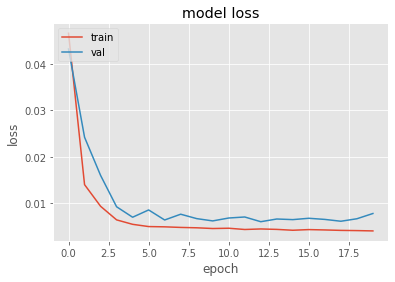

In [94]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [95]:
test_prediction = model.predict(X_test)
test_prediction = scaler.inverse_transform(test_prediction)

In [96]:
Y_test = Y_test.reshape(-1)
test_prediction = test_prediction.reshape(-1)

No handles with labels found to put in legend.


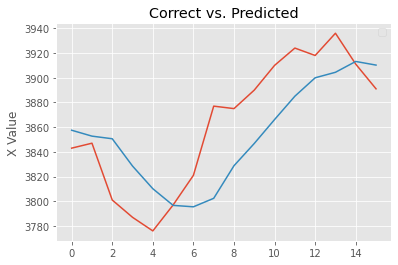

In [97]:
plt.plot(Y_test)
plt.plot(test_prediction)
plt.ylabel('X Value')
plt.title("Correct vs. Predicted")
plt.legend()
plt.show()

In [98]:
mse = mean_squared_error(Y_test, test_prediction)
rmse = math.sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 36.185071


#**LSTM RMSE is lower than SARIMA(0,1,0). LSTM performs best among the 3 for this dataset**

#A4.csv

#**Q4**

In [99]:
df = pd.read_csv("https://raw.githubusercontent.com/ammaarahmad1999/Time_Series_Dataset/main/A4.csv")

In [100]:
df

,x1,y1,x2,y2,x3,y3,x4,y4
0,4,4.26,4,3.10,4,5.39,8,6.58
1,5,5.68,5,4.74,5,5.73,8,5.76
2,6,7.24,6,6.13,6,6.08,8,7.71
3,7,4.82,7,7.26,7,6.42,8,8.84
4,8,6.95,8,8.14,8,6.77,8,8.47
5,9,8.81,9,8.77,9,7.11,8,7.04
6,10,8.04,10,9.14,10,7.46,8,5.25
7,11,8.33,11,9.26,11,7.81,8,5.56
8,12,10.84,12,9.13,12,8.15,8,7.91
9,13,7.58,13,8.74,13,12.74,8,6.89


In [101]:
def calculate(x, y):
  mean_x = np.mean(x)
  mean_y = np.mean(y)
  cov = np.cov(x, y=y, bias = True)
  var_x = cov[0][0]
  var_y = cov[1][1]
  cov_xy = cov[0][1]
  return mean_x, mean_y, var_x, var_y, cov_xy

In [106]:
def regression(x, y):
  mean_x, mean_y, var_x, var_y, cov_xy = calculate(x,y)
  beta = cov_xy/var_x
  alpha = mean_y - beta*mean_x
  y_hat = beta*x + alpha
  print(f'The Coefficient of Regression = {beta}')
  print(f'The intercept on y axis = {alpha}')
  ssy = np.sum((y - mean_y)**2)
  ssr = np.sum((y_hat - mean_y)**2)
  r2 = ssr/ssy
  print(f'The R2 coefficient = {r2}')
  plt.figure(figsize = (15,10))
  plt.scatter(x, y, color = 'red')
  plt.plot(x, y_hat, 'blue')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.show()

In [107]:
def inbuilt_regression(x, y):
  lr = LinearRegression()
  x = x.reshape(-1, 1)
  lr.fit(x.reshape(-1, 1),y)
  y_hat = lr.predict(x)
  print(y_hat.shape)
  print(f'The Coefficient of Regression = {lr.coef_}')
  print(f'Y Intercept = {lr.intercept_}')
  print(f'The R2 coefficient = {r2_score(y, y_hat)}')
  plt.figure(figsize = (15,10))
  plt.scatter(x, y, color = "red")
  plt.plot(x, y_hat, color = "green")
  plt.xlabel("x")
  plt.ylabel("y")
  plt.show()

The Coefficient of Regression = 0.5000909090909091
The intercept on y axis = 3.0000909090909076
The R2 coefficient = 0.666542459508775


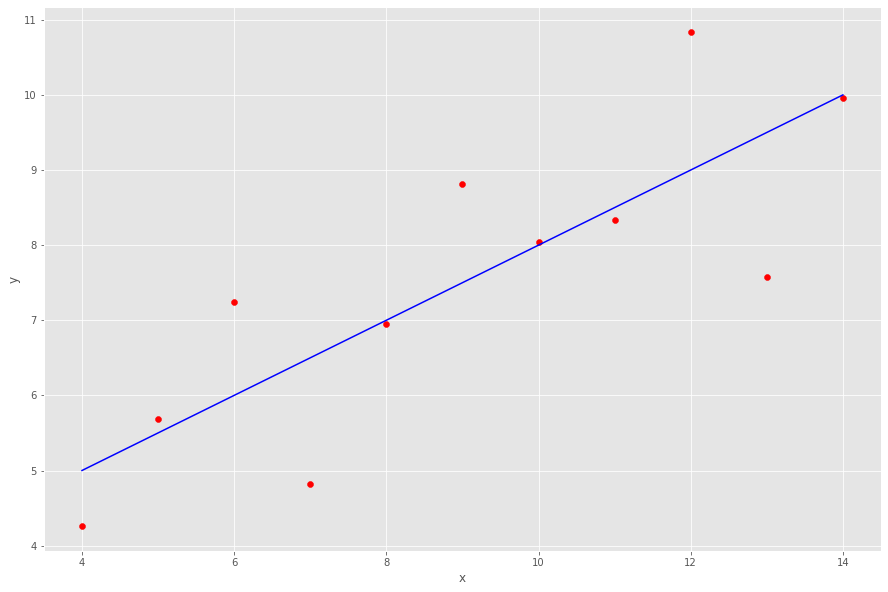

In [108]:
regression(df['x1'].values, df['y1'].values)

(11,)
The Coefficient of Regression = [0.50009091]
Y Intercept = 3.000090909090906
The R2 coefficient = 0.666542459508775


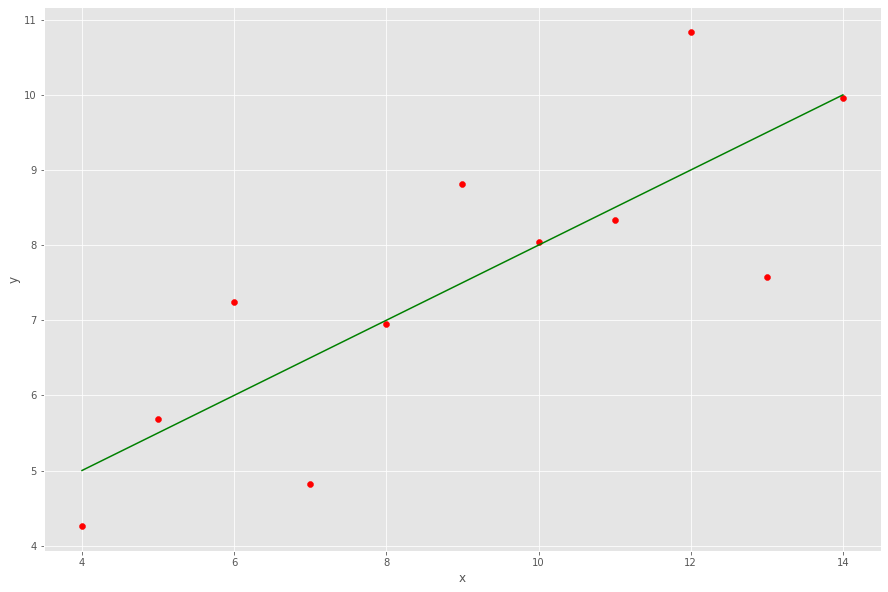

In [109]:
inbuilt_regression(df['x1'].values, df['y1'].values)

The Coefficient of Regression = 0.4999999999999999
The intercept on y axis = 3.000909090909091
The R2 coefficient = 0.6662420337274841


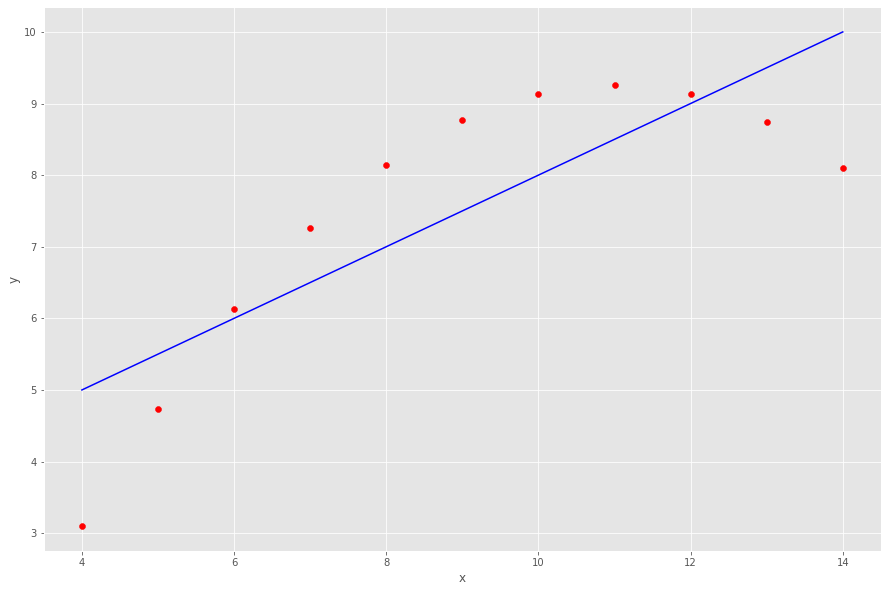

In [110]:
regression(df['x2'].values, df['y2'].values)

(11,)
The Coefficient of Regression = [0.5]
Y Intercept = 3.00090909090909
The R2 coefficient = 0.6662420337274844


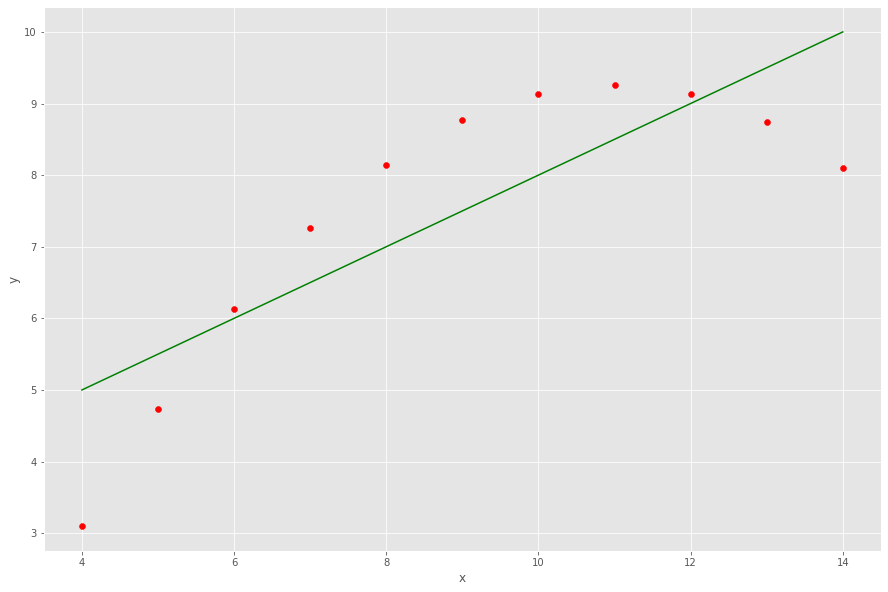

In [111]:
inbuilt_regression(df['x2'].values, df['y2'].values)

The Coefficient of Regression = 0.4997272727272727
The intercept on y axis = 3.0024545454545457
The R2 coefficient = 0.6663240410665591


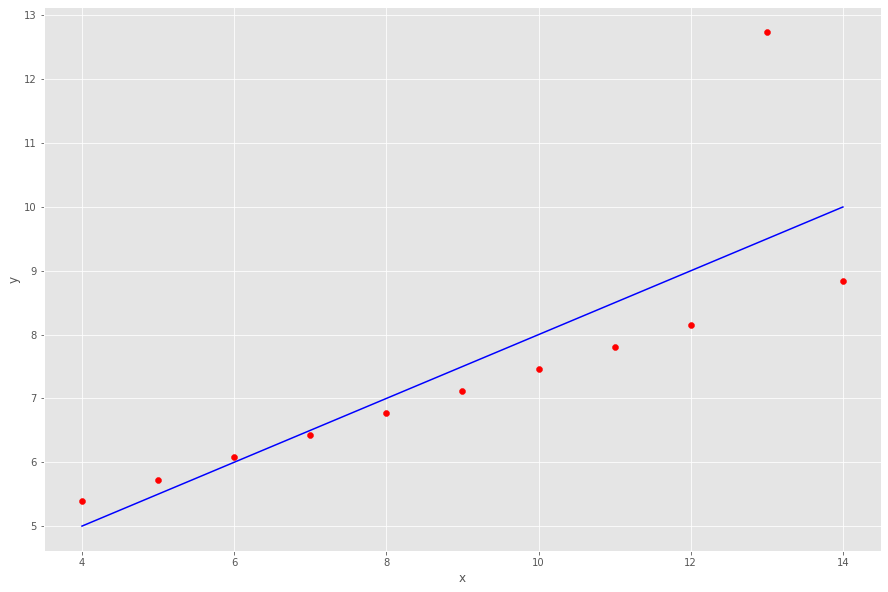

In [112]:
regression(df['x3'].values, df['y3'].values)

(11,)
The Coefficient of Regression = [0.49972727]
Y Intercept = 3.002454545454542
The R2 coefficient = 0.666324041066559


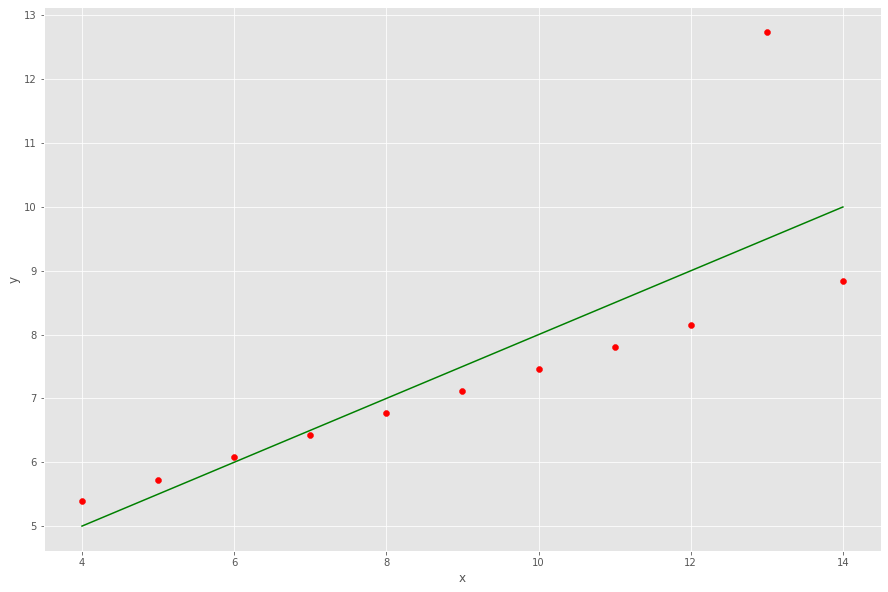

In [113]:
inbuilt_regression(df['x3'].values, df['y3'].values)

The Coefficient of Regression = 0.4999090909090909
The intercept on y axis = 3.0017272727272726
The R2 coefficient = 0.6667072568984653


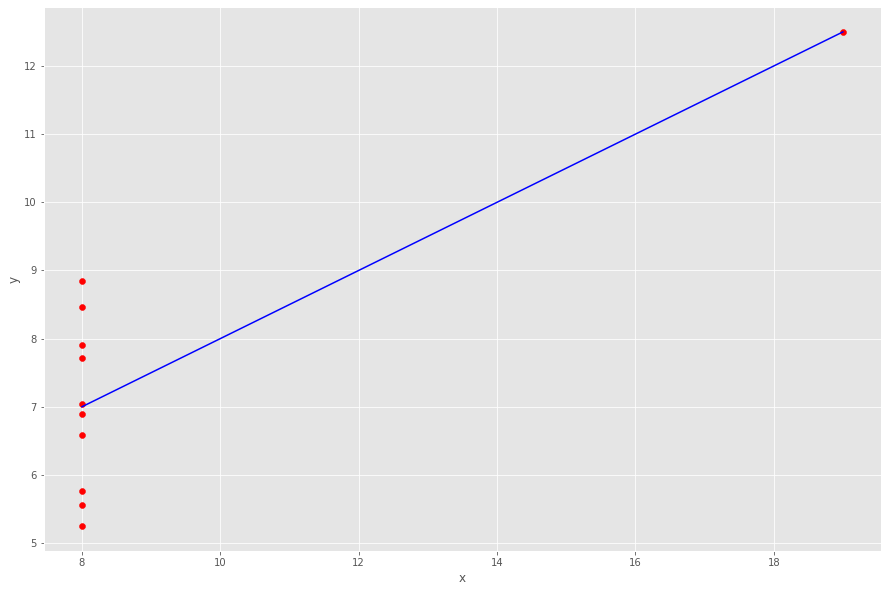

In [114]:
regression(df['x4'].values, df['y4'].values)

(11,)
The Coefficient of Regression = [0.49990909]
Y Intercept = 3.0017272727272726
The R2 coefficient = 0.6667072568984653


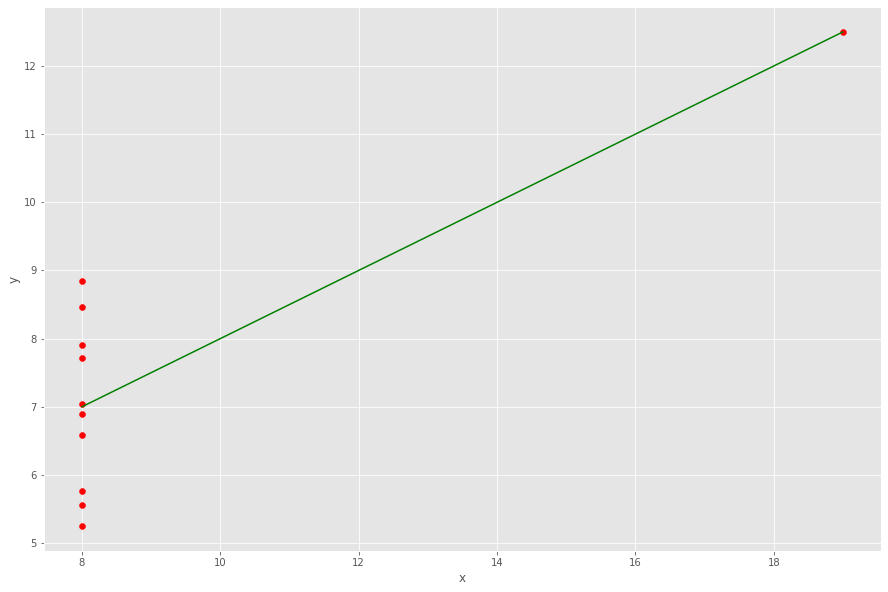

In [115]:
inbuilt_regression(df['x4'].values, df['y4'].values)

#This Dataset (x4, y4) has one outlier and thus misfit line is the output